In [1]:
using Pkg;
Pkg.activate(".");
Pkg.status();

  Activating new environment at `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 05 - Project\Project.toml`


      Status `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 05 - Project\Project.toml` (empty project)


# Simulating Swinging Atwood's Machine

For the first part of the project, we will use Julia to simulate the [Swinging Atwood's Machine](https://doi.org/10.1119/1.13791). The Swinging Atwood's Machine is simply your Atwood machine with two masses $M$ and $m$ connected with each other through a massless string, passing over a frictionless pulley. The only difference is that mass $m$ is able to freely rotate on a plane, as shown in the figure.

[<img src="sam_figure.png" alt="Swinging Atwood's Machine Setup" width="400">](https://imgur.com/a/4ylzmpm)

Using Lagrangian Mechanics Tufillaro, et. al., was able to determine that the equation of motion of $m$, described by the length of string it is suspended on, $r$, and its angular displacement from the vertical, $\theta$, can be expressed as:
\begin{align}
    (1+\mu)\ddot{r}=r\dot{\theta}^2+\mathrm{g}(\cos\theta-\mu), \\
    r\ddot{\theta}+2\dot{r}\dot{\theta}+\mathrm{g}\sin\theta=0,
\end{align}
where equations are called as the radial and angular equation respectively, and that the motion of $m$ is uniquely defined by $\mu=M/m$. For some $\mu$, as coined by Tufillaro, the trajectory of $m$ may be bounded, periodic, or terminating. Bounded trajectories are trajectories which $r$ does not exceed a certain maximum value. Periodic trajectories are those where the orbits are closed. Lastly, terminating trajectories are those where $r\to0$ for some time $t$. In our project, we are interested in obtaining these bounded and periodic trajectories.

We will numerically integrate these equations using Runge-Kutta 4 integrator, coded into Julia, then save as a separate file named ```SwingingAtwoodsMachine.jl```. The structure of the file is as follows. It will contain four functions: the main function which is where the system will be declared and simulated, then another function for integration, another function to define the differential equations for the system, and another to plot the trajectory. The way we will call this function is just be defining the mass ratio $\mu=M/m$ of the system. Then the simulation will run, and will show us the trajectory of $m$, $(x(t),y(t))$. For all runs, the initial condition for $m$ will always be as follows:
\begin{equation}
    r(0)=1, \quad \theta(0)=\tfrac{\pi}{2}, \qquad \dot{r}(0)=0, \quad \dot{\theta}(0)=0,
\end{equation}
as was done in Tufillaro, et. al.'s paper, and the default value for $\mu$ when simulating the system will be $\mu=1.185$.

After coding the simulation, here are the corresponding plots of trajectories for our Swinging Atwood's Machine.

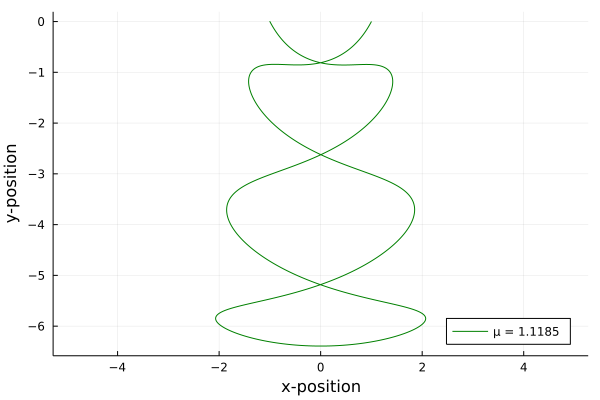

In [2]:
include("SwingingAtwoodsMachine.jl")
SwingingAtwoodsMachine()

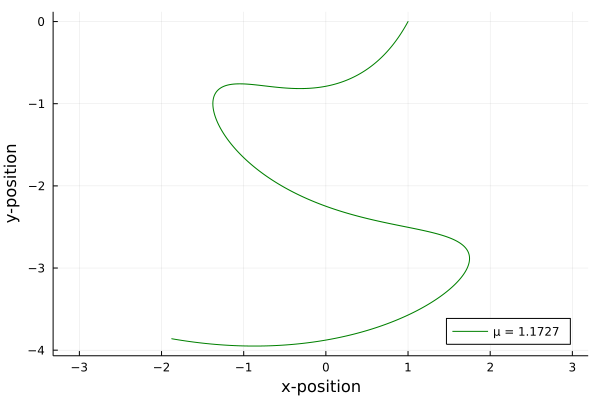

In [3]:
SwingingAtwoodsMachine(1.1727)

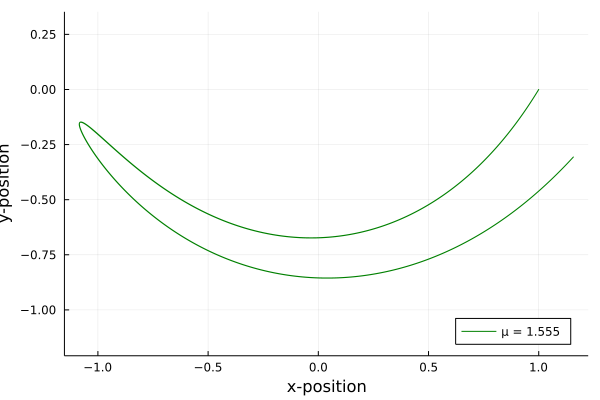

In [4]:
SwingingAtwoodsMachine(1.555)

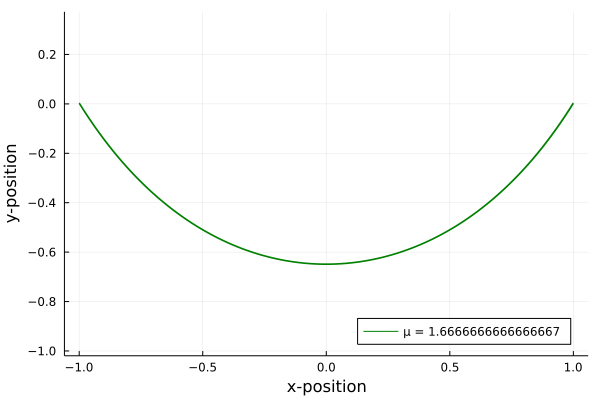

In [5]:
SwingingAtwoodsMachine(5.0/3.0)

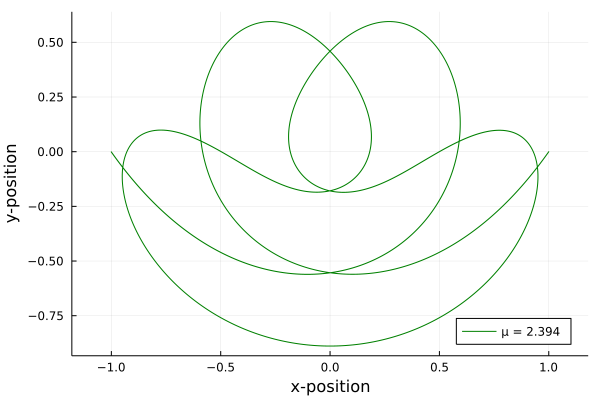

In [6]:
SwingingAtwoodsMachine(2.394)

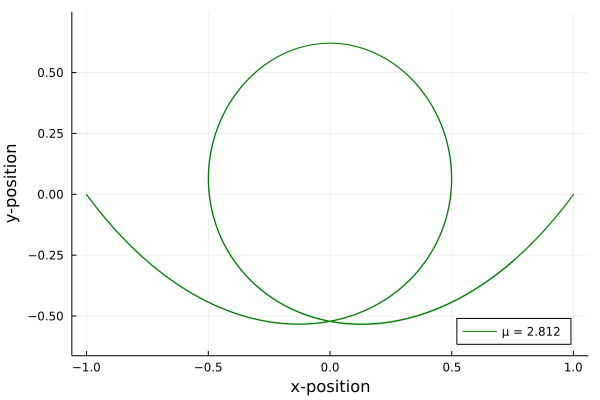

In [7]:
SwingingAtwoodsMachine(2.812)

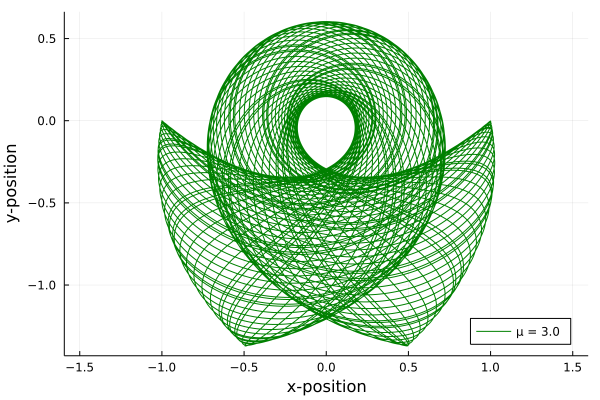

In [8]:
SwingingAtwoodsMachine(3.0,100.0)

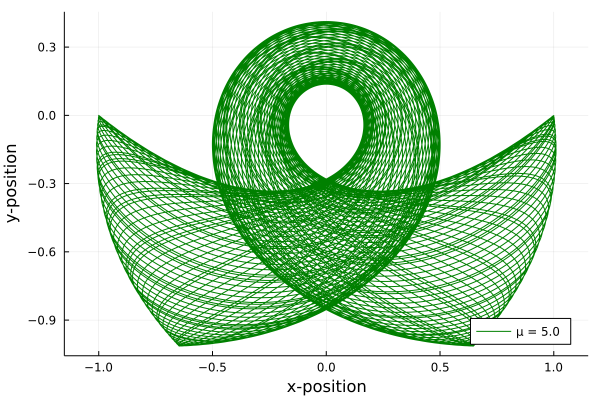

In [9]:
SwingingAtwoodsMachine(5.0, 100.0)

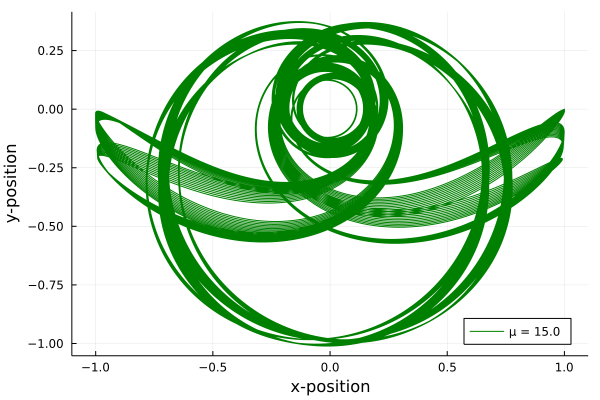

In [10]:
SwingingAtwoodsMachine(15.0, 100.0)

To observe its efficiency, we use the ```BenchmarkTools.jl``` module of Julia to do so. After doing this, we see that our program takes on average around 6.726 ms to run. If we do the same code using Python, and run it the same number of times as the Benchmarking Tools of Julia did, we see that it takes 26.773 ms on average to run! So Julia does the code around 4 times faster than Python would! That's really good!

In [11]:
using BenchmarkTools

bmark = @benchmark benchmark_func()
bmark = @benchmark benchmark_func()

BenchmarkTools.Trial: 766 samples with 1 evaluation.
 Range (min … max):  6.008 ms …  12.987 ms  ┊ GC (min … max): 0.00% … 6.62%
 Time  (median):     6.726 ms               ┊ GC (median):    9.61%
 Time  (mean ± σ):   6.524 ms ± 515.930 μs  ┊ GC (mean ± σ):  6.04% ± 5.18%

    ▆█▂                          ▃▂▂                           
  ▂▆███▅▃▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▃▅████▆▅▄▄▄▃▄▃▃▃▃▂▂▂▁▁▁▁▁▂▁▁▁▁▂ ▃
  6.01 ms         Histogram: frequency by time         7.4 ms <

 Memory estimate: 24.41 MiB, allocs estimate: 225003.